#### *Applied Mathematical Finance 2*

## <ins> *Seminar 4: Copulae* </ins>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm
np.random.seed(42)

### 1. Copulae in a nutshell

Consider a vector of random variables 

$$X := (X_1, \dots, X_n), \qquad F_{i}(x) = \text{Pr}[X_i \leq x], \quad i = 1, \dots, n,$$

where $F_{i}(x)$ are the marginal cumulative distribution functions. 


A **copula**  is the joint distribution function $$C: [0, 1]^n \to [0, 1]$$ of $(U_1, \dots, U_n)$, where $U_i \sim U[0, 1]$ are uniformly distributed random variables on $[0, 1]$. That is,     

$$C(u_1, \dots, u_n) = \text{Pr}[U_1 \leq u_1, \dots, U_n \leq u_n].$$

How to apply copulas to construct **dependent** random variables with marginals $F_{i}(x)$? For that we need to have the following simple result. 

<ins> **Proposition 1** </ins>  If $X$ is a random variable with the distribution function $F_X(x)$,

1) Then $F_X(X)$ is a random variable with uniform distribution on $[0, 1]$, that is $F_X(X) \sim U[0, 1]$.

2) And if $U$ is a uniform random variable on $[0, 1]$, then $F^{-1}_X(U)$ is a random variable with the distribution function $F_X(x)$.

<ins> *Proof* </ins> ...

Thus, given copula $C(u_1, \dots, u_n)$ and marginals $F_i(x)$, we may construct a vector of dependent random variables $(X_1, \dots, X_n)$: 

1) Given the procedure of sampling $(U_1, \dots, U_n)$ from copula $C$, sample $$(U_1, \dots, U_n) \sim C.$$
2) Knowing that $F^{-1}(U)$ is distributed with $F$, let  $$(X_1, \dots, X_n) = (F^{-1}_1(U_1), \dots, F^{-1}_n(U_n)).$$


### 2. Sklar's theorem

Sklar's theorem provides a theoretical justification for the application of copulas. More precisely, this theorem states that every multivariate cumulative distribution function 

$$H(x_1, \dots, x_n) = \text{Pr}[X_1 \leq x_1, \dots, X_n \leq x_n]$$

can be expressed in terms of its marginals $F_i(x) = \text{Pr}[X_i \leq x]$ and a copula $C$, that is 

$$H(x_1, \dots, x_n) = C(F_1(x_1), \dots, F_n(x_n)).$$

Moreover, if the marginals $F_i(x)$ are continuous, then $H$ is unique!

Conversely, given a copula $C: [0, 1]^n \to [0, 1]$ and marginals $F_i(x)$, the function $C(F_1(x_1), \dots, F_n(x_n))$ defines a $n$-dimensional distribution function with marginals $F_i(x)$. 

For the case of $n=2$, we can easily derive the density function of the copula. 

Lets denote by $v_1 = F_1(x_1)$, $v_2 = F_2(x_2)$. Then 

$$H(x_1, x_2) = C(v_1, v_2)$$
and 
$$h(x_1, x_2) = \dfrac{\partial^2 H(x_1, x_2)}{\partial x_1 \partial x_2} = \dfrac{\partial^2 C(v_1, v_2)}{\partial v_1 \partial v_2} \cdot \dfrac{\partial F_1(x_1)}{\partial x_1} \cdot \dfrac{\partial F_2(x_2)}{\partial x_2} = c(v_1, v_2) \cdot f_1(x_1) \cdot f_2(x_2).$$

Therefore, the copula density function $c(v_1, v_2)$ is 

$$
\begin{equation}
c(v_1, v_2) = \dfrac{h(F_1^{-1}(v_1), F_2^{-1}(v_2))}{f_1(F_1^{-1}(v_1)) f_2(F_2^{-1}(v_2))}.
\end{equation}
$$

### 3. Gaussian copula


The Gausian copula with correlation matrix $\Sigma$ can be written as 

$$C^{Gauss}_{\Sigma}(u_1, \dots, u_n) = \Phi_{\Sigma} (\Phi^{-1}(u_1), \dots, \Phi^{-1}(u_n)),$$

where $\Phi^{-1}$ is a cumulative distribution function of a standard normal distribution, $\Phi_{\Sigma}$ is the joint cumulative distribution function of a multivariate normal distribution with mean vector zero and covariance matrix $\Sigma$.

That is, if we wish to construct the variate vector $(X_1, \dots, X_n)$ with a given marginals $F_i(x)$ and coupled by the Gaussian copula with correlation matrix $\Sigma$, we need to proceed as follows: 

1. Find a suitable square root $L$ of $\Sigma$ such that $\Sigma = LL^T$ (for instance, using Cholesky decomposition). 

2. Draw a vector $\tilde Z$ of uncorrelated standard normal variables, that is $\tilde Z \sim N(0, I)$.

3. Compute a vactor $Z = L \tilde Z$ of correlated standard normal variables, that is $Z \sim N(0, \Sigma)$.

4. Map $Z$ to a vector $V$ of uniform variates on $[0, 1]^n$, that is $(V_1, \dots, V_n) = (\Phi(Z_1), \dots, \Phi(Z_n)).$

5. Construct the vector $X$ by use of the inverse probability functions, that is $(X_1, \dots, X_n) = (F^{-1}_1(V_1), \dots, F^{-1}_n(V_n))$.


For further applications, we will need to be able to consrtuct a vector of uniform variates under the Gaussian copula. For that reason, consider an example of two uniform variates. We assume tha the Copula is given by the correlation matrix $\Sigma$ with corresponding square root $L$

$$
\Sigma = 
\begin{pmatrix}
  1 & \rho\\ 
  \rho & 1
\end{pmatrix},
\quad 
L = 
\begin{pmatrix}
  1 & 0\\ 
  \rho & \sqrt{1 - \rho^2}
\end{pmatrix}.
$$  

Then 
$$\tilde Z = (\tilde Z_1, \tilde Z_2) = (\Phi^{-1}(U_1), \quad \Phi^{-1}(U_2)),$$
where $U_1, U_2$ (respectively, $\tilde Z_1$, $\tilde Z_2$) are **independent** uniform (resp., gaussian) variates, and 

$$Z = (Z_1, Z_2) = (\tilde Z_2, \quad \rho \tilde Z_1 + \sqrt{1 - \rho^2} \tilde Z_2)$$

where $Z_1, Z_2$ are correlated gaussian variables. Finally, 

$$(V_1, V_2) = (\Phi(Z_1), \Phi(Z_2))$$

are dependent uniform variables, exactly what we wanted.

The copula density (following the formula (1)) can be given as 


$$c(u_1, u_2) = \dfrac{1}{\sqrt{1 - \rho^2}} e^{-\dfrac{1}{2} \dfrac{\rho^2 (\Phi^{-1}(u_1))^2 - 2 \rho \Phi^{-1}(u_1) \Phi^{-1}(u_2) + \rho^2 (\Phi^{-1}(u_2))^2}{1 - \rho^2}}$$

In [2]:
n_sample = 10_000

In [3]:
def gaussian_copula(n_sample: int, rho: float = 0):
    """
    Returns the samepl from 2d Gaussian copula. 

    Args:
        n_sample: sample size. 
        rho: the correlation coefficient from covariance matrix. 
    """
    Z = np.random.randn(n_sample, 2)
    Z[:, 1] = rho * Z[:, 0] + np.sqrt(1 - rho**2) * Z[:, 1]
    U = norm.cdf(Z)
    return U

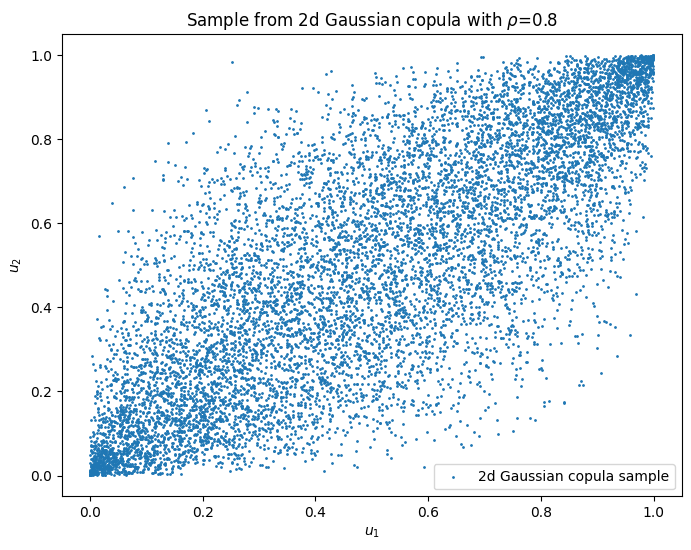

In [4]:
rho = 0.8
U_gauss = gaussian_copula(n_sample, rho=rho)
plt.figure(figsize=(8, 6))
plt.scatter(U_gauss[:, 0], U_gauss[:, 1], s=1, label="2d Gaussian copula sample")
plt.title("Sample from 2d Gaussian copula with $\\rho$={}".format(rho))
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.legend()
plt.show()

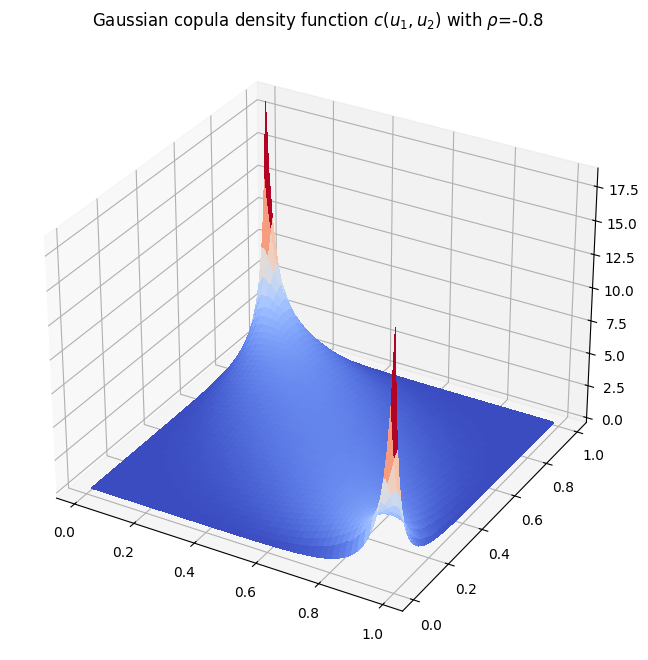

In [5]:
rho = -0.8

n_grid = 100
eps = 0.01
u1 = np.linspace(eps, 1-eps, n_grid)
u2 = np.linspace(eps, 1-eps, n_grid)
U1, U2 = np.meshgrid(u1, u2)
c = 1 / np.sqrt(1 - rho**2) * np.exp(rho / (1 - rho**2) * norm.ppf(U1) * norm.ppf(U2) - rho**2 / 2 / (1 - rho**2) * (norm.ppf(U1)**2 + norm.ppf(U2)**2))

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(U1, U2, c, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Gaussian copula density function $c(u_1, u_2)$ with $\\rho$={}".format(rho))
plt.show()


In [6]:
def correlation_coefficients(n_sample: int, rho: np.ndarray = 0):
    """
    Returns the Pearson correlation coefficients for a given sample. 

    Args:
        n_sample: sample size. 
        rho: an array of Gaussian copula correlations. 
    """
    correlations = list()
    for rho_ in rho:
        U_gauss = gaussian_copula(n_sample=n_sample, rho=rho_)
        corr_ = np.corrcoef(U_gauss.T)[0][1]
        correlations.append(corr_)
    return correlations

In [7]:
rho = np.linspace(-1, 1, 100)
n_sample = 100_000
correlations = correlation_coefficients(n_sample=n_sample, rho=rho)

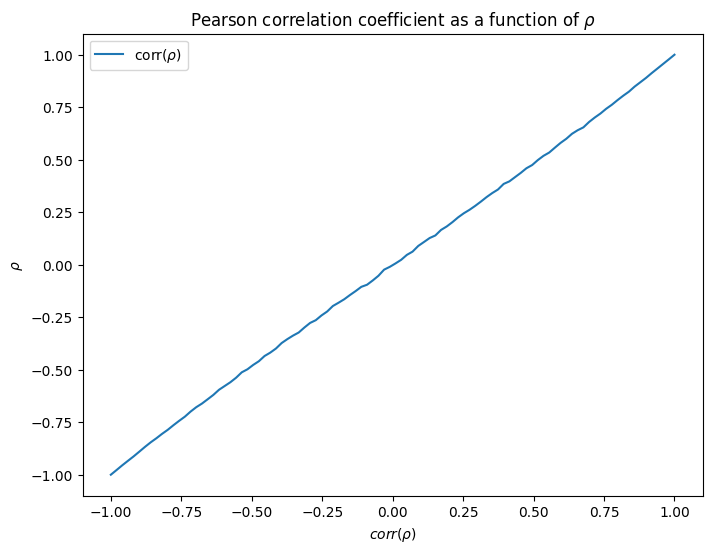

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(rho, correlations, label="corr($\\rho$)")
plt.xlabel("$corr(\\rho)$")
plt.ylabel("$\\rho$")
plt.title("Pearson correlation coefficient as a function of $\\rho$")
plt.legend()
plt.show()

From theoretical point of view, it can be shown that 
$$corr(\rho) \approx \frac{3}{\pi} \rho, \quad |\rho| \ll 1,$$

so don't be misled by the apparently straight line!

### 4. Applications to Monte-Carlo integration

Copulas can be directly applie to numerical Monter-Carlo integration methods. That is, given a random vector of **dependent** variables $(X_1, \dots, X_n)$ with density function $H$, we may want to compute the expecation of $g(X_1, \dots, X_n)$ for some Borel function $g: \mathbb{R}^d \to \mathbb{R}$, which can be written as 

$$\mathbb{E}g(X_1, \dots, X_n) = \int_{\mathbb{R}^n} g(X_1, \dots, X_n) dH(X_1, \dots, X_n).$$

Applying the Sklar's theorem, $H$ can be represented by some copula $C$, i.e. 

$$H(x_1, \dots, x_n) = C(F_1(x_1), \dots, F_n(x_n)).$$

Therefore, the expectation from above can be written as 

$$\mathbb{E}g(X_1, \dots, X_n) = \int_{[0, 1]^n} g(F^{-1}_1(u_1), \dots, F^{-1}_n(u_n)) dC(u_1, \dots, u_n).$$

Finally, the expectation can be estimated through the following Monte-Carlo algorithm

For each $k = 1, \dots, n$, 
1. Draw a $k$-th sample $(U^k_1, \dots, U^k_n)$ from the copula $C$. 

2. Set $(X^k_1, \dots, X^k_n) = (F^{-1}_1(U^k_1), \dots, F^{-1}_n(U^k_n))$.

Approximate $\mathbb{E}g(X_1, \dots, X_n)$ by its empirical analogue 

$$\mathbb{E}g(X_1, \dots, X_n) \approx \dfrac{1}{n} \sum_{k=1}^{n} g(X^k_1, \dots, X^k_n).$$


### References

1. Jäckel, Peter. Monte Carlo methods in finance. (2002).